# Assignment 1.

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdataanalysis2020/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 2nd, 2020 at 23:55. Hand in your files via [`http://peergrade.io`](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. Thus, the peer evaluations are due on Monday March 9th, 2020 at 23:55.

## Setting up the data and packages

Relevant packages are loaded. The data is read using the pandas package. Proper types for columns such as "Date" and "Time" should be converted to an appropriate data format. Useful data are added to the data frame such as year, month, day and hour, this avoids redundancy in the code. Finally, X and Y are renamed to longitude and latitude, respectivly, to avoid confusion.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

#Setting seaborn styled plots
sns.set(style='darkgrid', palette='muted', color_codes=True)

In [4]:
path="C:\\Users\\Christian\\Desktop\\Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"
df = pd.read_csv(path)

#Converting data to datetime format
df["Date"]=pd.to_datetime(df["Date"])
#Converting time to timedelta format
df.Time=pd.to_timedelta(df["Time"]+':00')
#Renaming X and Y to corresponding longitude and latitude
df.rename(columns={"X":"Lon", "Y": "Lat"}, inplace = True)

#Adding columns of year, month, day and hour
df=df.assign(Year=df["Date"].dt.year)
df=df.assign(Month=df["Date"].dt.month)
df=df.assign(Day=df["Date"].dt.dayofweek)
df=df.assign(Hour=df.Time.dt.components['hours'])

## Part 1: Temporal Patterns

We look only at the focus-crimes in the exercise below

In [5]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 
                   'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 
                   'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 
                   'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
df_focus = df[df["Category"].isin(focuscrimes)]

*Exercise*: More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year). In this exercise, please generate the visualizations described below. 

* *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?

In [6]:
weekly_crime=df_focus.groupby(["Category","Day"]).count()["IncidntNum"]

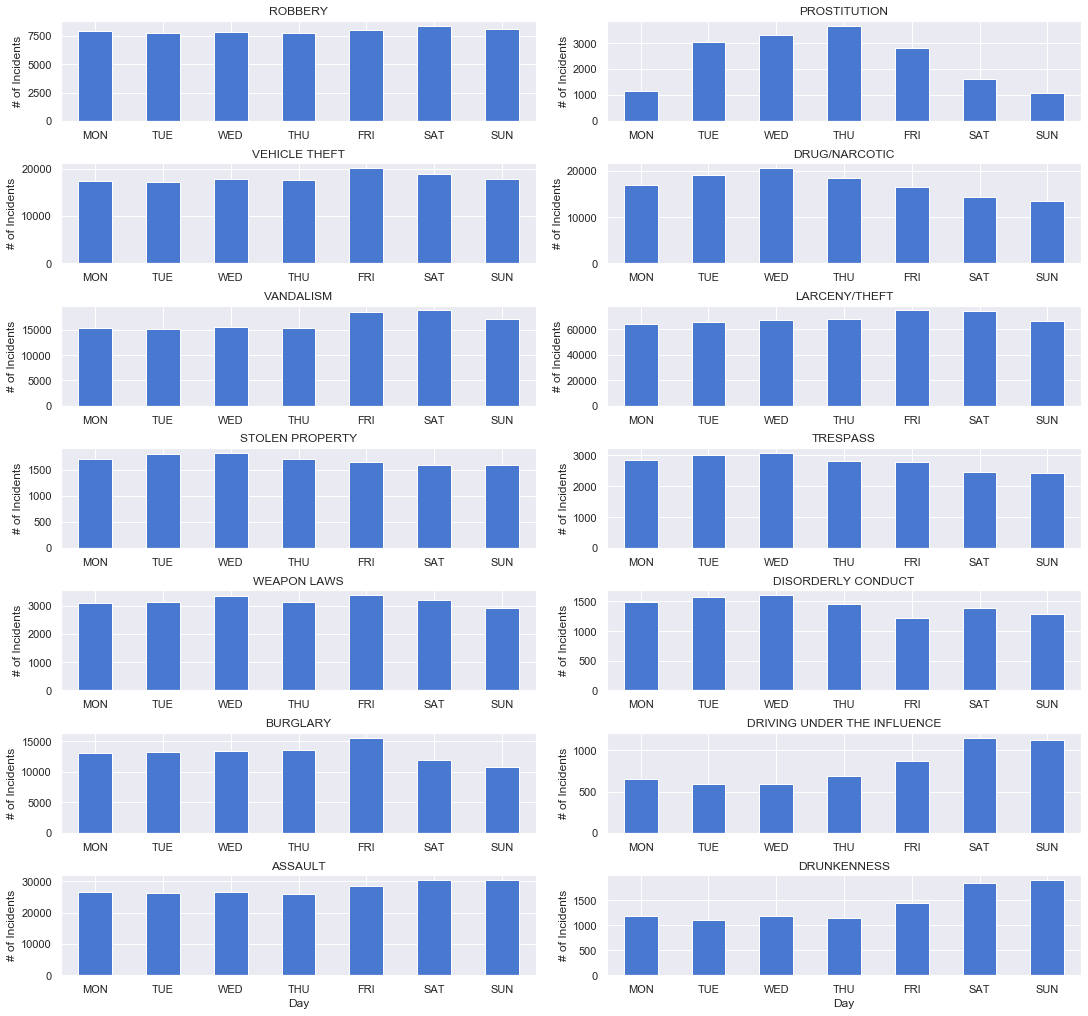

In [7]:
days=['MON','TUE','WED','THU','FRI','SAT','SUN']

fig, axes=plt.subplots(nrows=7, ncols=2, figsize=(15,14), constrained_layout=True)
y=0
x=0
for i, crime in enumerate(focuscrimes):
    weekly_crime[crime].plot.bar(ax=axes[x,y])
    axes[x,y].set_title(crime)
    axes[x,y].set_ylabel('# of Incidents')
    axes[x,y].set_xticklabels(days, rotation=0)
    axes[x,y].set_xlabel('')
    if (i == 6) | (i == 13):
        axes[x,y].set_xlabel("Day")
    x+=1
    if i ==6:
        y+=1
        x = 0
plt.show()

We see a large increase in prostitution during the mid-week. Another interesting increase is "driving under the influence", where the incidents increase in the weekend, there could be a correlation with "drunkenness", which also increase in the weekends.

* *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

In [8]:
monthly_crime=df_focus.groupby(["Category","Month"]).count()["IncidntNum"]

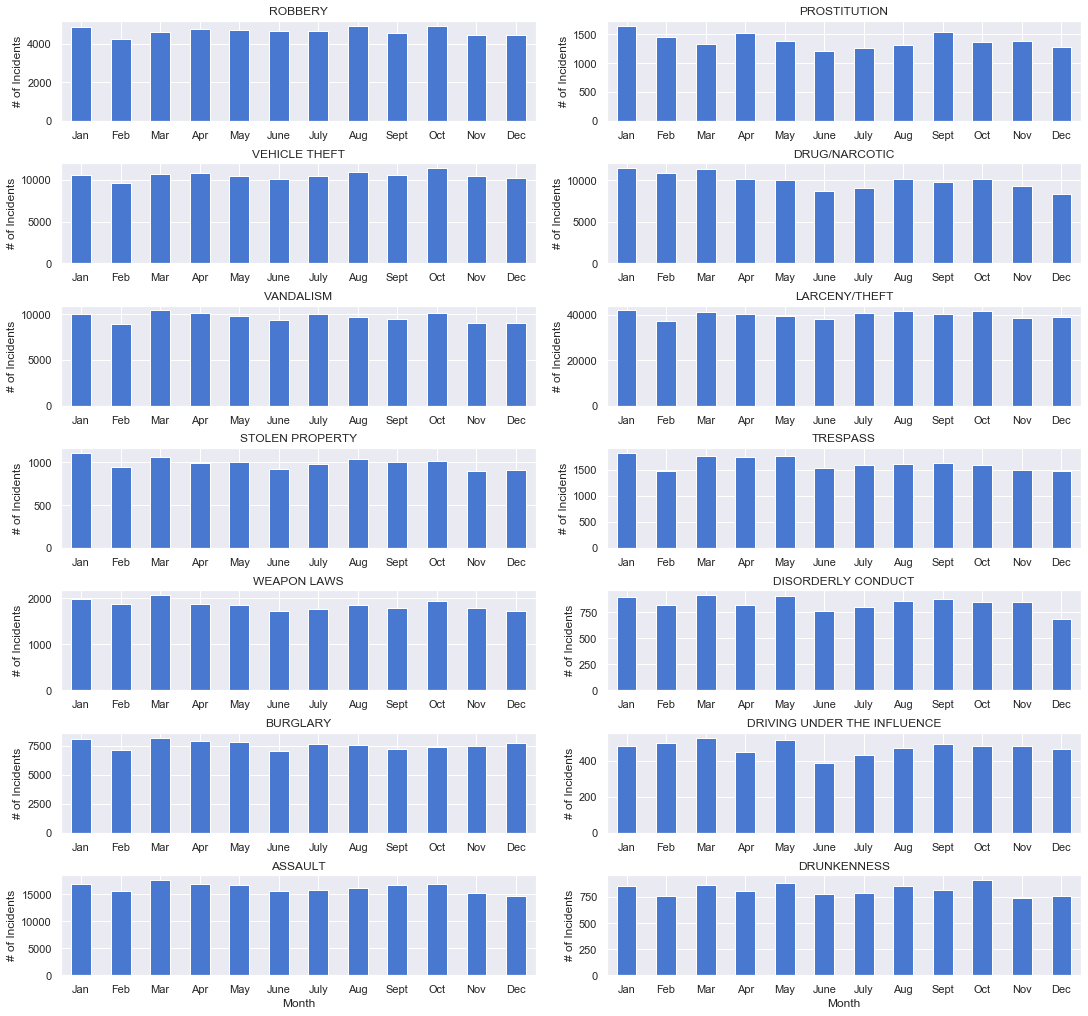

In [9]:
months=["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

fig, axes=plt.subplots(nrows=7, ncols=2, figsize=(15,14), constrained_layout=True)
y=0
x=0
for i, crime in enumerate(focuscrimes):
    monthly_crime[crime].plot.bar(ax=axes[x,y])
    axes[x,y].set_title(crime)
    axes[x,y].set_ylabel('# of Incidents')
    axes[x,y].set_xlabel('')
    axes[x,y].set_xticklabels(months, rotation=0)
    if (i == 6) | (i == 13):
        axes[x,y].set_xlabel("Month")
    x+=1
    if i ==6:
        y+=1
        x = 0

A surprise here is to see that there seem to be less incidents during summer, especially incidents with driving under the influence. There also seem to be a decrease during Christmas for quite a few of focus crimes, "disorderly conduct" and "drug narcotic", however besides that most incidents seem to fairly stationary, regardless of the month.

* *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 

In [10]:
hourly_crime=df_focus.groupby(["Category","Hour"]).count()["IncidntNum"]

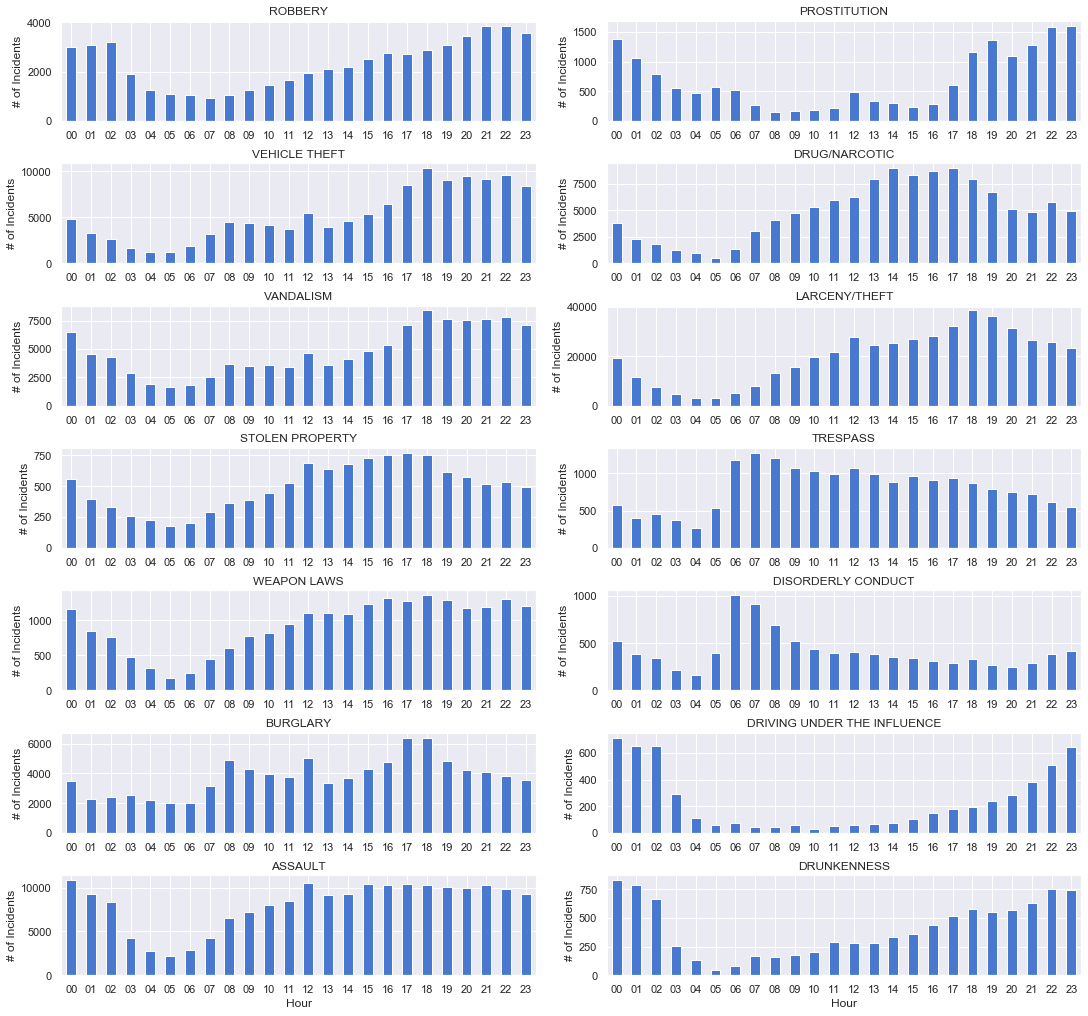

In [32]:
hours = ["0"+str(i) for i in range(10)] + [str(i) for i in range(10,24)]

fig, axes=plt.subplots(nrows=7, ncols=2, figsize=(15,14), constrained_layout=True)
y=0
x=0
for i, crime in enumerate(focuscrimes):
    hourly_crime[crime].plot.bar(ax=axes[x,y],rot=0)
    axes[x,y].set_title(crime)
    axes[x,y].set_ylabel('# of Incidents')
    axes[x,y].set_xlabel('')
    axes[x,y].set_xticklabels(hours, rotation=0)
    if (i == 6) | (i == 13):
        axes[x,y].set_xlabel("Hour")
    x+=1
    if i ==6:
        y+=1
        x = 0
plt.show()

It is seen that most crimes are low in the early morning, around 04:00-06:00, this makes sense, as most people are sleeping during those hours. A lot of crimes such as Driving under the influence, drunkenness, prostitution, vehicle theft and robbery occur during late evening/night, the night gives an excellent cover for robbing people and theft, the same applies to prostitution and most people get influenced by drugs or alcohol during nighttime. Burglary seem to have its prime time around 17-18. This is when people get home from work, to the surprise there has been a breaking, which might explain the sharp rise in incidents during those periods.

* *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

In [45]:
hotw_crime=df_focus.groupby(["Category","Day","Hour"]).count()["IncidntNum"]

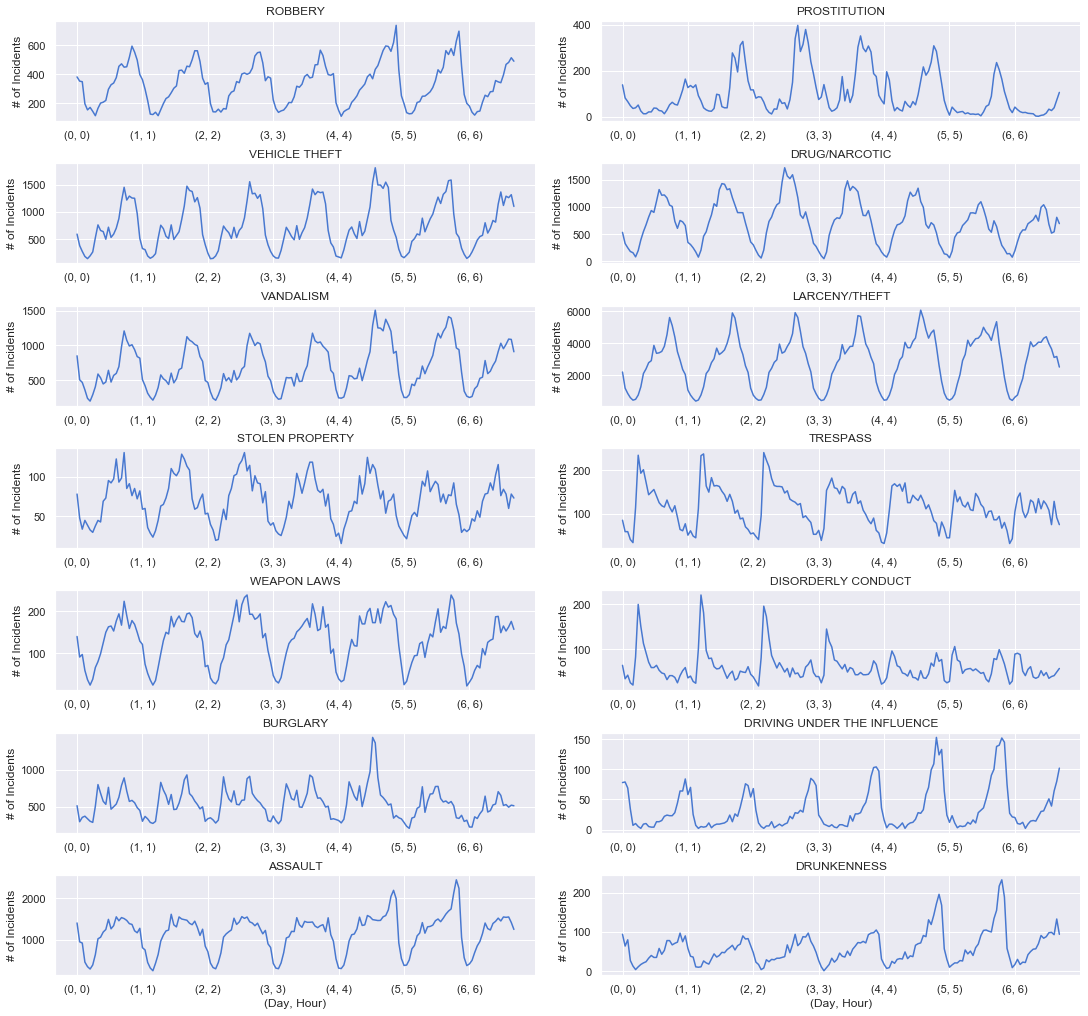

In [47]:
fig, axes=plt.subplots(nrows=7, ncols=2, figsize=(15,14), constrained_layout=True)
y=0
x=0
for i, crime in enumerate(focuscrimes):
    hotw_crime[crime].plot(ax=axes[x,y],rot=0)
    axes[x,y].set_title(crime)
    axes[x,y].set_ylabel('# of Incidents')
    axes[x,y].set_xlabel('')
    if (i == 6) | (i == 13):
        axes[x,y].set_xlabel('(Day, Hour)')
    x+=1
    if i ==6:
        y+=1
        x = 0
plt.show()



Here we see the periodic behaviour of incidents for each focus crime. Compared to the first plot in part 1, this gives more information, we not only see the day of the crime but also the time of it. A few strange behaviours is seen, such as the spike in burglary and the large mid-week increase in prostitution. It is also strange to see the high spikes of "disorderly conduct" during mondays, tuesdays and wednesdays.

## Part 2: Thinking about data and visualization

*Excercise:* Questions for the [first video lecture](https://www.youtube.com/watch?v=9D2aI30AMhM).
* What is the difference between *data* and *metadata*? How does that relate to the bike-example?
* Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
* Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
* In your own words, explain the difference between *exploratory* and *explanatory* data analysis. 


*Excercise:* Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).
* As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
* What is the difference between a bar-chart and a histogram?
* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

## Part 3: Generating important plot types

*Excercise*: Let us recreate some plots from DAOST but using our own favorite dataset.

* First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

* Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 
* Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).
* Finally, grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can bee misleading? 

## Part 5: Heatmaps of geo-data

*Exercise*: A new take on geospatial data using Folium (see the Week 4 exercises for full info and tutorials). 

Now we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.

* First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command `folium.Map([lat, lon], zoom_start=13)`, where you'll have to look up San Francisco's longitude and latitude.

In [77]:
lat= 37.773972
lon= -122.431297
f=folium.Figure(width=800, height=600)
folium.Map([lat, lon], zoom_start=13).add_to(f)

![map5_1](map5_1.png)

Since we will use the base map a lot, a generate function is implemented:

In [63]:
def generateBaseMap(default_location=[37.773972,-122.431297], default_zoom_start=13, 
                    default_tiles='OpenStreetMap'):
    f=folium.Figure(width=800, height=600)
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start,
                          tiles=default_tiles).add_to(f)
    return base_map

* Next, use the the coordinates for SF City Hall `37.77919, -122.41914` to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).

In [76]:
base_map=generateBaseMap(default_tiles="Stamen Toner")

#marker location
city_hall_loc = [37.77919, -122.41914]

#We add the marker to the base_map
folium.Marker(city_hall_loc, icon=folium.Icon(color='blue'), popup='City Hall').add_to(base_map)

base_map

![map5_2](map5_2.png)

* Now, let's plot some more data (no need for popups this time). Select a couple of months of data for `'DRUG/NARCOTIC'` and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this a kind of visualization a *point scatter plot*.

In [75]:
#Selecting the DRUG/NARCOTIC category
df_drug=df[df["Category"]=="DRUG/NARCOTIC"]

#Selecting the rows where year=2016 and choose June and July 
df_drug=df_drug[(df_drug.Year == 2016)&(df_drug.Month >= 6) & (df_drug.Month <= 7)]

#Get the latitude and longitude
df_drug=df_drug[["Lat","Lon"]].values

base_map=generateBaseMap()
#Iterate over each coordinate to plot a circlemarker
for coord in df_drug:
    folium.CircleMarker(coord,radius=1,color='black').add_to(base_map)

base_map

![map5_3](map5_3.png)

------
* Next, let's play with **heatmaps**. You can figure out the appropriate commands by grabbing code from the main [tutorial](https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data)) and modifying to suit your needs.
   * To create your first heatmap, grab all arrests for the category `'SEX OFFENSES, NON FORCIBLE'` across all time. Play with parameters to get plots you like.

Selecting the category 'SEX OFFENSES, NON FORCIBLE' and find all resolutions containing the word ARREST. When the correct data has been selected, the latitude and longitude coords are extracted.

In [66]:
df_heat=df[(df['Category']=='SEX OFFENSES, NON FORCIBLE') & (df["Resolution"].str.contains("ARREST"))]
df_heat=df_heat[["Lat","Lon"]].values

Now the heat map can be created using the HeatMap function of the Folium package.

In [147]:
base_map=generateBaseMap()
HeatMap(data=df_heat, radius=20, blur = 15, max_zoom=16, min_opacity=0.6).add_to(base_map)
base_map

![map5_4](map5_4.png)

   * Now, comment on the differences between scatter plots and heatmaps. 
      - What can you see using the scatter-plots that you can't see using the heatmaps? 
      - And *vice versa*: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?
      

In the scatter plot it is very easy to visualize exact locations of events. In the heat map the density of an isolated data point might span a fairly large spatial location on the map, giving a wrong impression of the data. This does not occur in the scatter plot as each data point is visualized equally without any density. Therefore scatter plots are better at visualizing outliers, as the outliers will only be visible at the exact location.

Heatmaps allow one to see densities of data points in a spatial location. This means, that when multiple data points are clustered close to each other, the heat map will show the density of the cluster. In the scatter plot the clustered data points might overlap hiding some of the data points, information is then lost, which is instead retained by the heatmap based on the intensity of the colors generated by the density of the heatmap. Another benefit of the heatmaps is that they easily give an overview of the hotspots, giving a quick overview of the entire dataset.

   * Play around with the various parameter for heatmaps. You can find a list here: https://python-visualization.github.io/folium/plugins.html

In [73]:
base_map=generateBaseMap()
HeatMap(data=df_heat, radius=10, blur = 13, max_zoom=10, min_opacity=0.5,
        gradient={0.2: 'red', 0.4: 'purple', 0.6: 'orange', 1: 'blue'}).add_to(base_map)
base_map

![map5_5](map5_5.png)

   * Comment on the effect on the various parameters for the heatmaps. How do they change the picture? (at least talk about the `radius` and `max_zoom`).

`max_zoom`: intensity scales with zoom, which means that with a bigger max_zoom, the intensities of each point will be lower at a given zoom. Once the zoom is bigger than max_zoom the intensity of the points will not increase further.

`radius` determines the "size" of each point. With bigger size, points that are further away will fuse together, instead with a smaller size they will barely appear on the map.

`blur` this defines the amount of blur to each point. With small blur we get more defined points, each with high intensity, with high blur we get less defined points, a bigger area for each of the points, which results in a lower intensity.

`min_opacity` The minimum opacity the heat will start at. So a low value will make the heat be less opaque and a larger one will make it more.

`gradient` defines the color corresponding to the gradient of the density. The "edge" of the density will have a small gradient with the gradient increasing the closer to the peak one comes.

For one combination of settings, my heatmap plot looks like this.

![maps](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/crime_hot_spot.png)
   * In that screenshot, I've (manually) highlighted a specific hotspot for this type of crime. Use your detective skills to find out what's going on in that building on the 800 block of Bryant street ... and explain in your own words. 

All addresses seem to follow a pattern, this let us deduce that the data entry must be named "800 Block of BRYANT ST". Let us first take all the values containing "800 Block of BRYANT ST" and find the location. 

In [151]:
crime_bst=df[df["Address"].str.contains("800 Block of BRYANT ST")]

In [152]:
locations=crime_bst[["Lat","Lon"]]
locations.head(3)

,Lat,Lon
0,37.775421,-122.403405
82,37.775421,-122.403405
168,37.775421,-122.403405


Now let's zoom in to the location where the crimes occur by using the zoom_start parameter of the base map function.

In [167]:
base_map=generateBaseMap(default_location=list(locations.iloc[[1]].values[0]),default_zoom_start=22)
#base_map

![map5_7](map5_7.png)

As we see the location is very close to the Hall of Justice, this is a court room and explains the number of incidents occurring at this address, as a lot of upcoming criminals will go to the court. Just for the fun of it, let's take a look at the crimes around 800 Bryant Street.

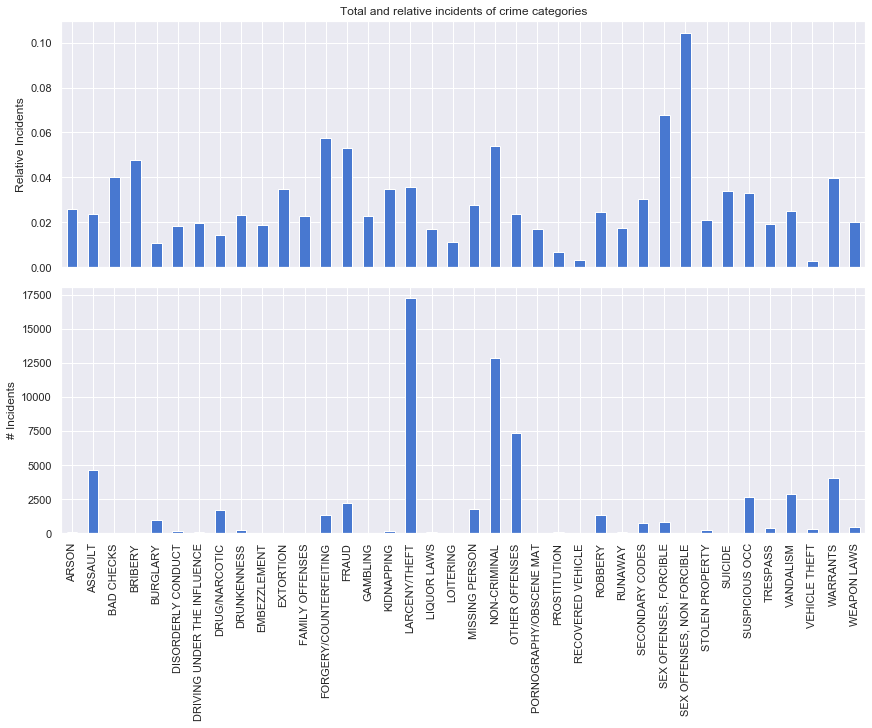

In [165]:
#fig=plt.figure(figsize=(12,5))
fig, axes=plt.subplots(nrows=2, ncols=1, figsize=(12,10), constrained_layout=True)
plot_df=(crime_bst.groupby("Category")["IncidntNum"].count().div(df[df.Category != "TREA"].groupby("Category").count()["IncidntNum"]).plot(kind="bar",ax=axes[0]))
plot_df2=crime_bst.groupby("Category")["IncidntNum"].count().plot(kind="bar",ax=axes[1])
axes[0].set_title("Total and relative incidents of crime categories")
axes[1].set_ylabel('# Incidents')
axes[0].set_ylabel('Relative Incidents')
axes[0].set_xlabel('')
axes[0].set_xticklabels([])
axes[1].set_xlabel('')
plt.show()

We see a lot of larceny/theft, non-criminal, other-offenses incidents in the absolute number of incidents, these are also very common crimes. Looking at the relative crimes is more interesting, here it is seen that this single location accounts for around 2-4% of all incidents for a lot of the categories, and for some, around 6-10% of all the incidents. This is a fairly large number of incidents for a single address location.

*Exercise*: Heat map movies. This exercise is a bit more independent than above - you get to make all the choices.

* Start by choosing your favorite crimetype. Prefereably one with spatial patterns that change over time (use your data-exploration from the previous lectures to choose a good one).

In previous exploration it was seen that the crime type DRUNKENNESS had a decent amount of data points. One should imagine that the incidents of drunkenness starts to increase around late evening as people start going out to party. Let us visualize it!

In [69]:
df_time=df[(df["Category"]=="DRUNKENNESS")][["Hour","Lat","Lon"]]

* Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though.

We want to look at what time incidents of DRUNKENNESS occur the most based on the visualization. An hourly time-resolution is chosen. First the time period is extracted (24-hours). Then each latitude and longitude for all DRUNKENNESS crimes in the given hour is extracted.

In [70]:
hours_sort = df_time.Hour.sort_values().unique()
crime_pr_hour = []

for i in hours_sort:
    crime_pr_hour.append(df_time[df_time.Hour==i][["Lat","Lon"]].values.tolist())

* Create the movie using `HeatMapWithTime`.

In [72]:
base_map=generateBaseMap()
HeatMapWithTime(crime_pr_hour, speed_step=1).add_to(base_map)
base_map

![map5_6](map5_6.png)
![map5_6_2](map5_6_2.png)

* Comment on your results: 
  - What patterns does your movie reveal?
  - Motivate/explain the reasoning behind your choice of crimetype and time-resolution. 

In the above frames the first frame is from 01:00 in the night and the second is at 05:00 in the morning. From the movie one can observe that incidents due to drunkenness mainly occur in peak hours when people have been out for some time, 22:00 to 03:00. After 03:00 a sharp decrease in incidents is observed, this is probably because most people have gone to bed. Incidents seem to remain low until 07:00. After 07:00 a steady increase can be observed until the peak hours 22:00 - 03:00. Intuitively it all makes sense, people can't drink when sleeping and most drinking occur in the late evening/night hours.

The reason the hourly time-resolution was chosen is to see the variation of drunkenness incidents during the day. Intuitively it would make great sense to see a large variation of incidents as people tend to drink more later in the day. This is also illustrated in the movie above. To investigate drunkenness is relevant as drunkenness may also lead to worse crimes, such as assault, therefore based on the movie a picture of hot spots is shown, so it is possible to take action in hot areas.

## Part 6: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 

1. In the hourly activity for `PROSTITUTION` something surprising is going on on Wednesday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/prostitution_hourly.png), where I've highlighted the phenomenon I'm talking about.
1. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/jitter_plot.png), where I've highlighted the phenomenon I'm talking about.
1. And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/crime_hot_spot.png).

*Exercise*: Data errors. The data errors we discovered above become invisible when we aggregate data. When we calculate mean values, statistics more generally. And when we visualize, they become difficult to notice when when we bin the data. We explore this process in the exercise below.

This last exercise has two parts.
* In each of the three examples above, describe in your own words how could the data-errors I call attention to above can biased the binned versions of the data and also briefly mention how it could create errors in how we understand what's going on in San Francisco and our modeling.
* (Optional) Find your own example of human noise in the data and visualize it.